## Taxi fare breakdown

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ['tpep_pickup_datetime', 
        'passenger_count', 
        'trip_distance', 
        'fare_amount',
        'extra',
        'mta_tax',
        'tip_amount',
        'tolls_amount',
        'improvement_surcharge',
        'total_amount',
        'congestion_surcharge']


In [3]:
filenames = ['../data/nyc_taxi_2019-01.csv', 
             '../data/nyc_taxi_2019-07.csv',
             '../data/nyc_taxi_2020-01.csv',
             '../data/nyc_taxi_2020-07.csv']

all_dfs = [pd.read_csv(one_filename,
                    usecols= cols,
                    parse_dates=['tpep_pickup_datetime'])
           for one_filename in filenames]

df = pd.concat(all_dfs)
all_dfs = all_dfs.clear()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21183631 entries, 0 to 800411
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   passenger_count        float64       
 2   trip_distance          float64       
 3   fare_amount            float64       
 4   extra                  float64       
 5   mta_tax                float64       
 6   tip_amount             float64       
 7   tolls_amount           float64       
 8   improvement_surcharge  float64       
 9   total_amount           float64       
 10  congestion_surcharge   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 GB


In [5]:
cols.pop(0)

'tpep_pickup_datetime'

In [6]:
df[cols] = df[cols].astype(np.float32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21183631 entries, 0 to 800411
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   passenger_count        float32       
 2   trip_distance          float32       
 3   fare_amount            float32       
 4   extra                  float32       
 5   mta_tax                float32       
 6   tip_amount             float32       
 7   tolls_amount           float32       
 8   improvement_surcharge  float32       
 9   total_amount           float32       
 10  congestion_surcharge   float32       
dtypes: datetime64[ns](1), float32(10)
memory usage: 1.1 GB


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
df.groupby([df['tpep_pickup_datetime'].dt.year, 
            df['tpep_pickup_datetime'].dt.month])['total_amount'].sum()

tpep_pickup_datetime  tpep_pickup_datetime
2001                  2                                3.80
2002                  2                              162.82
2003                  1                                0.00
2008                  12                             848.05
2009                  1                            2,074.56
2010                  8                               18.36
2018                  11                             787.79
                      12                           6,289.36
2019                  1                      120,238,400.00
                      2                            1,166.58
                      3                               55.50
                      4                               97.52
                      5                               26.16
                      6                            3,596.88
                      7                      123,755,136.00
                      8                            1,045.

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

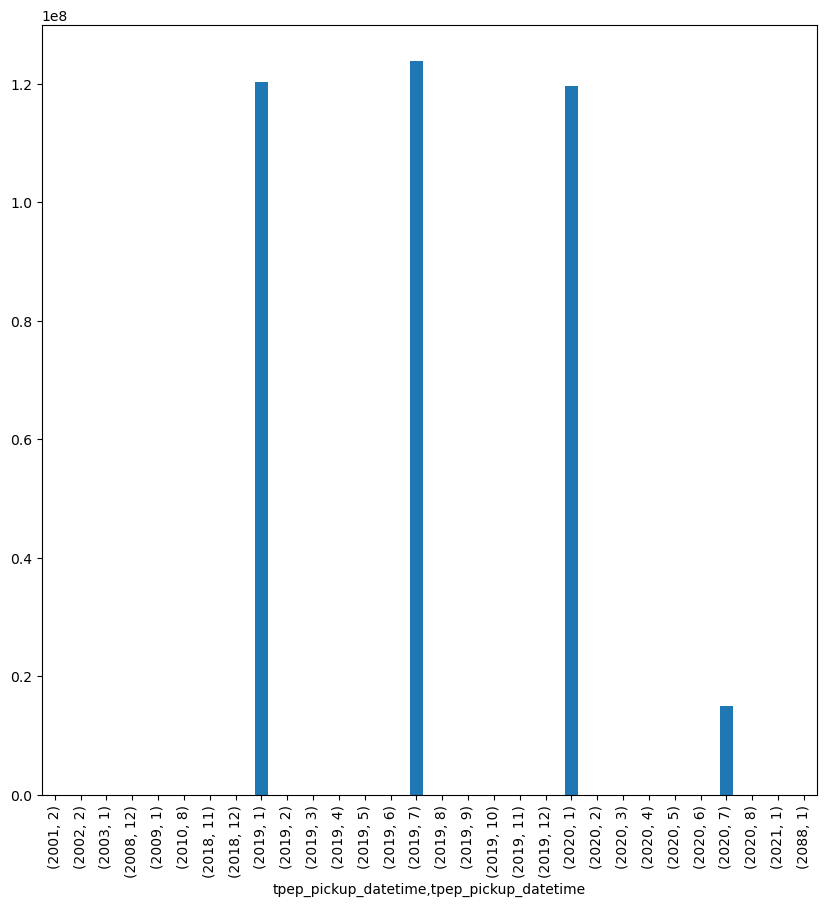

In [10]:
df.groupby([df['tpep_pickup_datetime'].dt.year, 
            df['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar(figsize=(10,10))

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

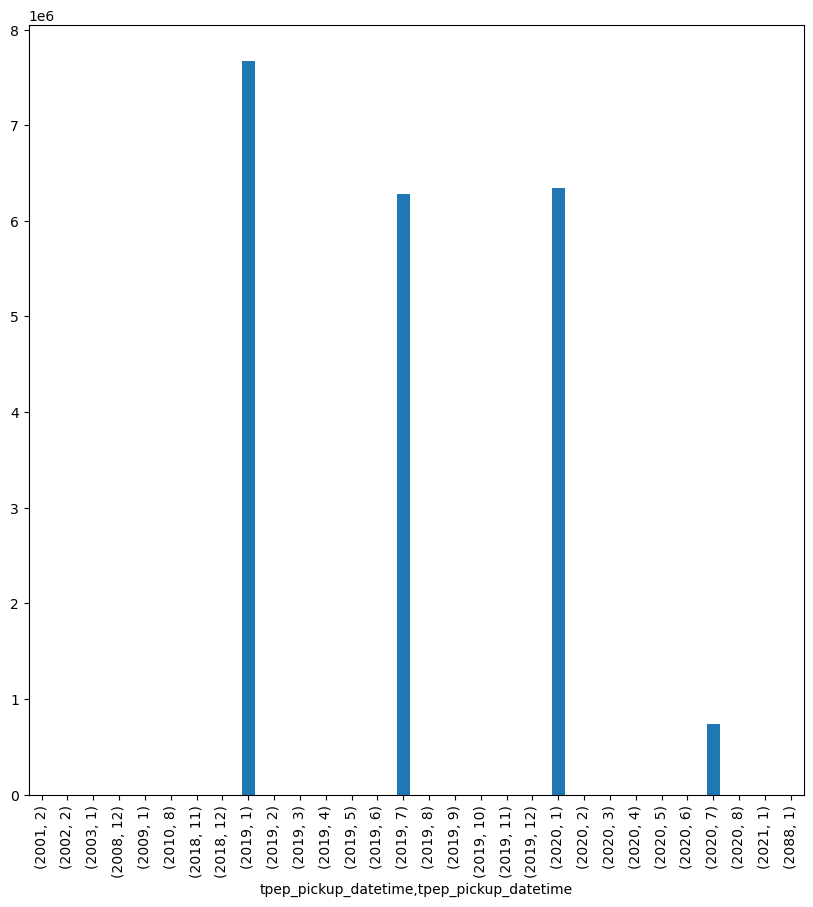

In [11]:
df.groupby([df['tpep_pickup_datetime'].dt.year,
            df['tpep_pickup_datetime'].dt.month])['passenger_count'].count().plot.bar(figsize=(10,10))

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

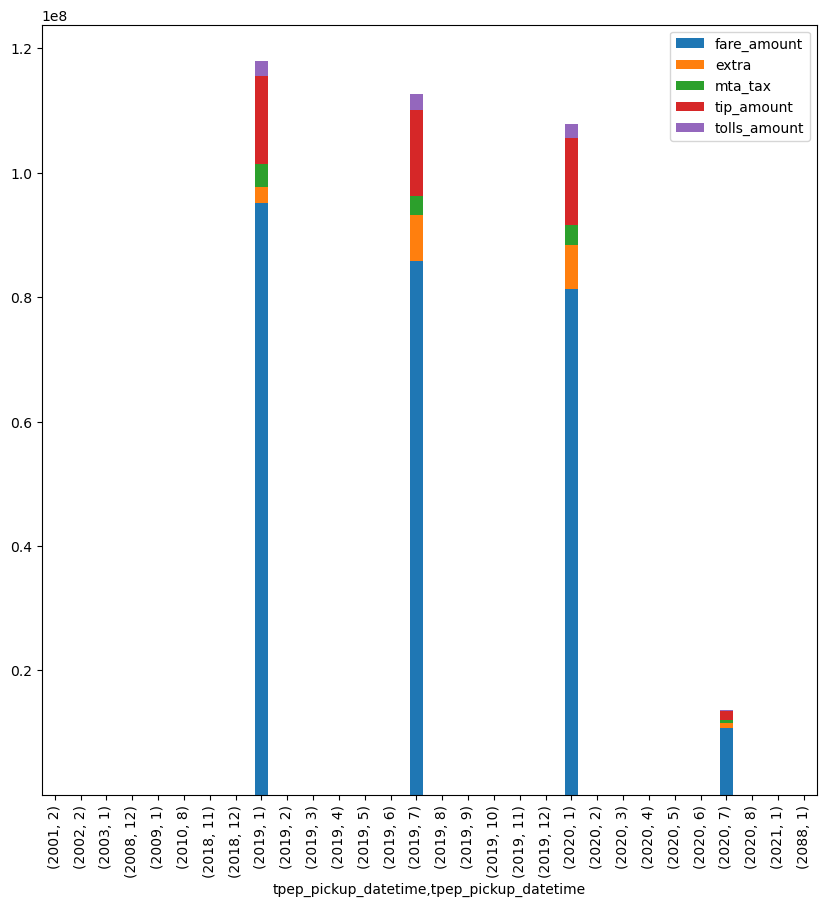

In [12]:
df.groupby([df['tpep_pickup_datetime'].dt.year, 
            df['tpep_pickup_datetime'].dt.month])[['fare_amount','extra',
                                                   'mta_tax','tip_amount',
                                                   'tolls_amount']].sum().plot.bar(stacked=True, 
                                                                                   figsize=(10,10))

<Axes: xlabel='passenger_count'>

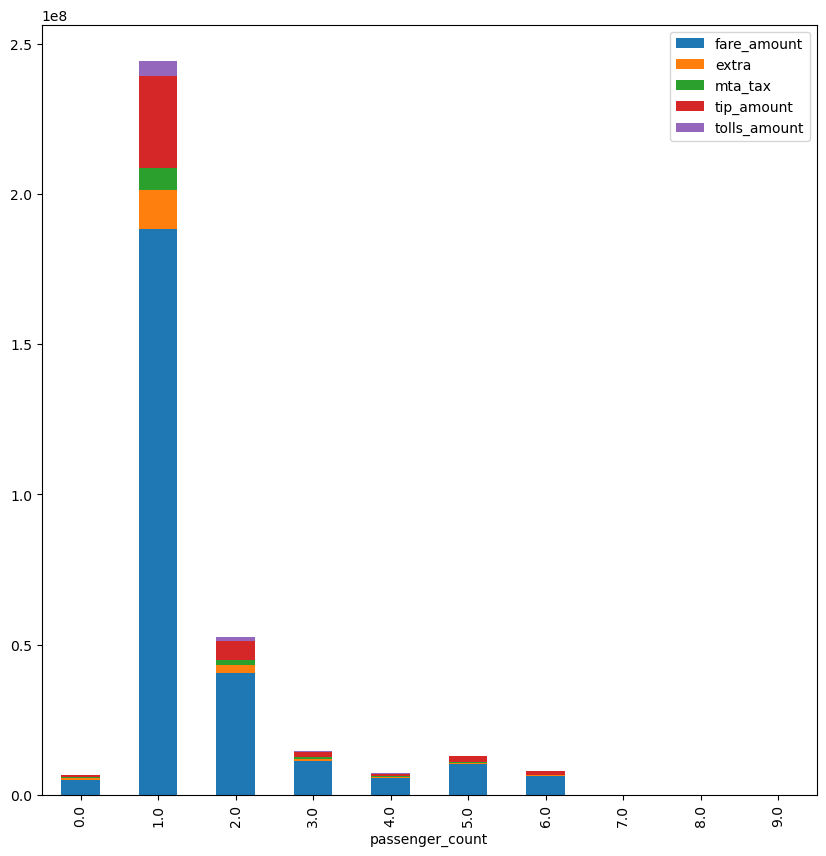

In [13]:
df.groupby(df['passenger_count'])[['fare_amount','extra','mta_tax','tip_amount',
                                   'tolls_amount']].sum().plot.bar(stacked=True, 
                                                                   figsize=(10,10))

In [14]:
df = df[df['fare_amount'] > 0]

In [15]:
df['tip_percentage'] = df['tip_amount'] / df['fare_amount']

<Axes: ylabel='Frequency'>

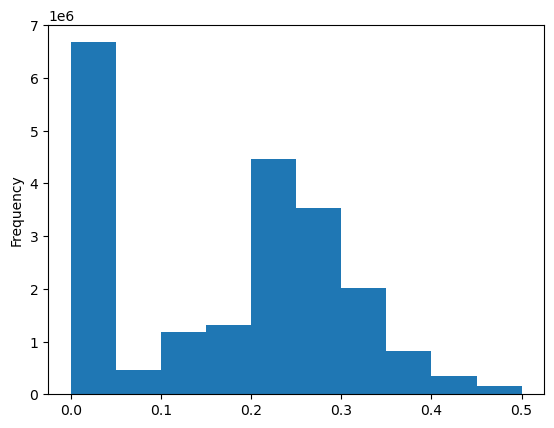

In [16]:
df.loc[df['tip_percentage'] <= .50, 'tip_percentage'].plot.hist()
 

<Axes: xlabel='tpep_pickup_datetime'>

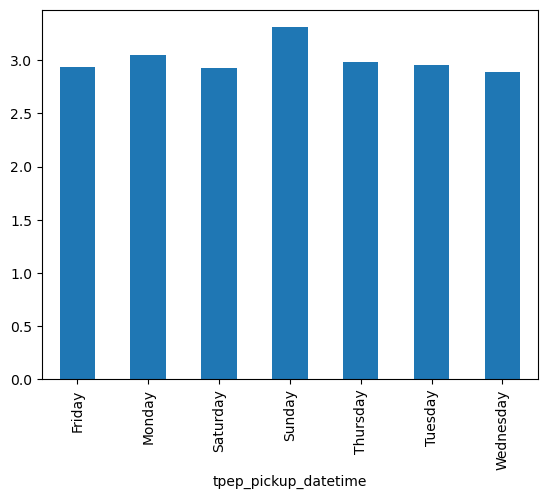

In [17]:
df.groupby(df['tpep_pickup_datetime'].dt.day_name())['trip_distance'].mean().plot.bar()

# CAREFUL ABOUT YOUR DEVICES MAMORY. IT MAY CRUSH.

<Axes: xlabel='trip_distance', ylabel='total_amount'>

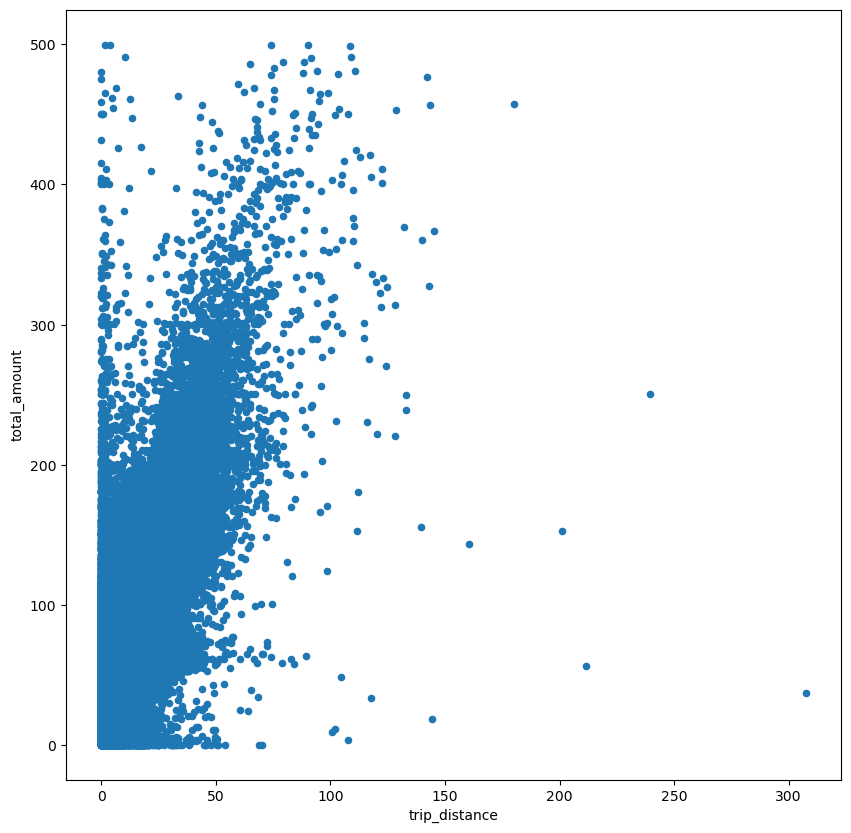

In [18]:
df.loc[((df['trip_distance'] > 0) &
          (df['total_amount'] > 0) &
          (df['trip_distance'] < 500) &
          (df['total_amount'] < 500))].plot.scatter(x='trip_distance', y='total_amount', figsize = (10,10))

# CAREFUL ABOUT YOUR DEVICES MAMORY. IT MAY CRUSH.

<Axes: xlabel='trip_distance', ylabel='passenger_count'>

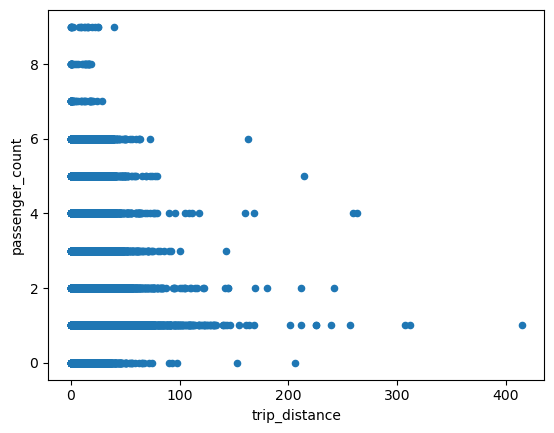

In [19]:
df.loc[((df['trip_distance'] > 0) &
          (df['trip_distance'] < 500))].plot.scatter(x='trip_distance', y='passenger_count')